# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('/Users/taiwoalabi/Downloads/PoisonousMushrooms-master/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('/Users/taiwoalabi/Downloads/PoisonousMushrooms-master/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [4]:
print(Y)

[1 0 0 ... 1 0 1]


In [5]:
np.unique(train_labels)

array([0, 1])

(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [6]:
def P1(k):
    
### STUDENT START ###
    for ii in k:
        pca = PCA(n_components=ii)
        pca.fit(X)
        if ii == 50:
            print(pca.explained_variance_)


### STUDENT END ###

k = [ii+1 for ii in range(50)]
P1(k)

[1.91529498 1.58248589 1.11025961 0.72242369 0.45784242 0.41986771
 0.35700166 0.31614018 0.30228739 0.23661447 0.2333632  0.21168946
 0.20365301 0.19321621 0.17444558 0.17410047 0.16726332 0.15994337
 0.15182636 0.1314363  0.12285792 0.12165591 0.11811829 0.10785806
 0.09940895 0.09781285 0.09345592 0.0870156  0.08341598 0.07955392
 0.07463113 0.07090976 0.06866679 0.06277352 0.06038446 0.05875368
 0.05400973 0.05213434 0.04924289 0.04900707 0.04667928 0.04318148
 0.04039991 0.03916751 0.03753762 0.03485522 0.03083388 0.02644368
 0.02512142 0.02323157]


(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

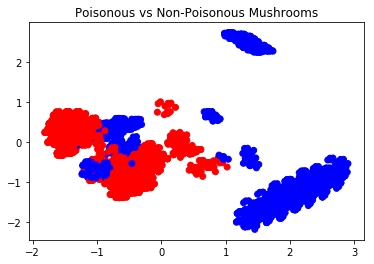

In [7]:
def P2():

    ### STUDENT START ###
    pca1 = PCA(n_components=2)
    X1 = pca1.fit_transform(train_data)

    ##Plotting the Variables##
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    p = plt.subplot(1, 1, 1)
    p.scatter(X1[:, 0], X1[:, 1], c=train_labels, cmap=cm_bright)
    plt.title("Poisonous vs Non-Poisonous Mushrooms")
    ### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

[0.23046110219397892, 0.3219064216441095, 0.40363243509172164, 0.47923771260370696, 0.7984050262084271, 0.44219564812655326, 0.42205432682270444, 0.4148657620741526, 0.35048397185181435, 0.5312824353005299, 0.6632640715213025, 0.32689322631417367, 0.5307620741867687, 0.41849163799824846, 0.4220062298983893, 0.4228430228032914]


array([8, 1, 1, ..., 8, 6, 3], dtype=int32)

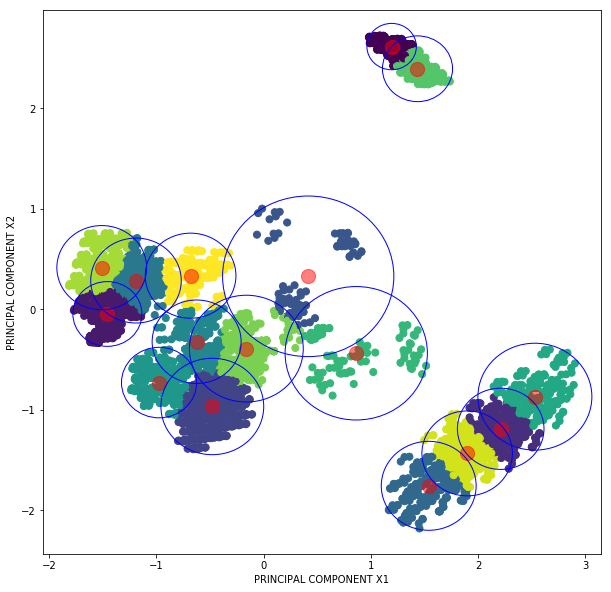

In [54]:
def P3():
    
### STUDENT START ###
    pca1 = PCA(n_components=2)
    X1 = pca1.fit_transform(train_data)
    
    kmeans = KMeans(n_clusters=16)
    kmeans.fit(X1)
    y_kmeans = kmeans.predict(X1)
    
    ###Marking a circle that goes through the most distant point assigned###
    fig, ax = plt.subplots(figsize=(10,10)) 
    fig = plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    label1 = kmeans.labels_
    
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel("PRINCIPAL COMPONENT X1")
    plt.ylabel("PRINCIPAL COMPONENT X2")
    
    

    #Getting the Radii of the circles for each of the 16 labels identified#
    YMax = []
    ValueLabels = []
    for iii in list(np.unique(label1)):
        YValues = []
        for ii in range(len(label1)):
            if label1[ii] == iii:
                YY = list(centers[iii])
                #Yvalues.append(X1[ii][1])
                #Xvalues.append(X1[ii][0])
                RValues = ((YY[0] - X1[ii][0])**2 + (YY[1] - X1[ii][1])**2)**0.5
                YValues.append(RValues)
        #for iv in range(len(Yvalues)):
            #RValues = sqrt((Yvalues[iv]-))
        YMax.append(max(YValues))
        ValueLabels.append(iii)
    print(YMax)
    
    #Plotting the circles#
    circle1 = plt.Circle(((list(centers[0])[0]), (list(centers[0])[1])), YMax[0], color='blue', fill=False)
    circle2 = plt.Circle(((list(centers[1])[0]), (list(centers[1])[1])), YMax[1], color='blue', fill=False)
    circle3 = plt.Circle(((list(centers[2])[0]), (list(centers[2])[1])), YMax[2], color='blue', fill=False)
    circle4 = plt.Circle(((list(centers[3])[0]), (list(centers[3])[1])), YMax[3], color='blue', fill=False)
    circle5 = plt.Circle(((list(centers[4])[0]), (list(centers[4])[1])), YMax[4], color='blue', fill=False)
    circle6 = plt.Circle(((list(centers[5])[0]), (list(centers[5])[1])), YMax[5], color='blue', fill=False)
    circle7 = plt.Circle(((list(centers[6])[0]), (list(centers[6])[1])), YMax[6], color='blue', fill=False)
    circle8 = plt.Circle(((list(centers[7])[0]), (list(centers[7])[1])), YMax[7], color='blue', fill=False)
    circle9 = plt.Circle(((list(centers[8])[0]), (list(centers[8])[1])), YMax[8], color='blue', fill=False)
    circle10 = plt.Circle(((list(centers[9])[0]), (list(centers[9])[1])), YMax[9], color='blue', fill=False)
    circle11 = plt.Circle(((list(centers[10])[0]), (list(centers[10])[1])), YMax[10], color='blue', fill=False)
    circle12 = plt.Circle(((list(centers[11])[0]), (list(centers[11])[1])), YMax[11], color='blue', fill=False)
    circle13 = plt.Circle(((list(centers[12])[0]), (list(centers[12])[1])), YMax[12], color='blue', fill=False)
    circle14 = plt.Circle(((list(centers[13])[0]), (list(centers[13])[1])), YMax[13], color='blue', fill=False)
    circle15 = plt.Circle(((list(centers[14])[0]), (list(centers[14])[1])), YMax[14], color='blue', fill=False)
    circle16 = plt.Circle(((list(centers[15])[0]), (list(centers[15])[1])), YMax[15], color='blue', fill=False)



    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(circle6)
    ax.add_artist(circle7)
    ax.add_artist(circle8)
    ax.add_artist(circle9)
    ax.add_artist(circle10)
    ax.add_artist(circle11)
    ax.add_artist(circle12)
    ax.add_artist(circle13)
    ax.add_artist(circle14)
    ax.add_artist(circle15)
    ax.add_artist(circle16)
    return label1
### STUDENT END ###

P3()

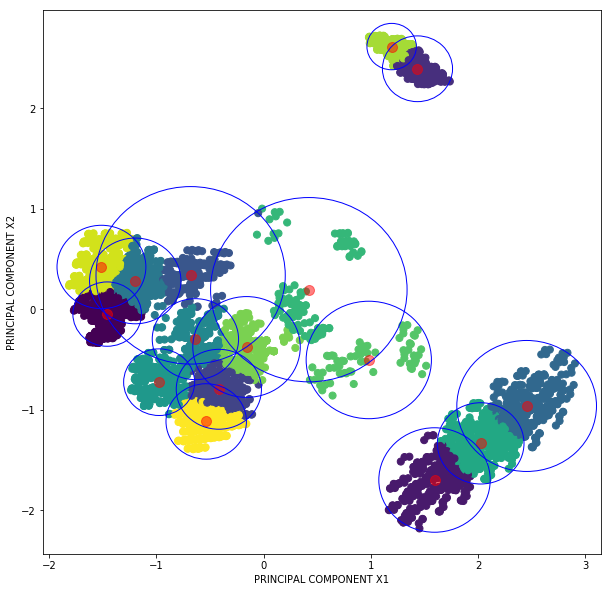

In [53]:
pca1 = PCA(n_components=2)
X1 = pca1.fit_transform(train_data)
    
kmeans = KMeans(n_clusters=16)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
    
###Marking a circle that goes through the most distant point assigned###

###Creating a plot matrix table###
fig, ax = plt.subplots(figsize=(10,10)) 

fig = plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
label1 = kmeans.labels_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel("PRINCIPAL COMPONENT X1")
plt.ylabel("PRINCIPAL COMPONENT X2")
YMax = []
ValueLabels = []
for iii in list(np.unique(label1)):
    YValues = []
    for ii in range(len(label1)):
        if label1[ii] == iii:
            YY = list(centers[iii])
            #Yvalues.append(X1[ii][1])
            #Xvalues.append(X1[ii][0])
            RValues = ((YY[0] - X1[ii][0])**2 + (YY[1] - X1[ii][1])**2)**0.5
            YValues.append(RValues)
    #for iv in range(len(Yvalues)):
        #RValues = sqrt((Yvalues[iv]-))
    YMax.append(max(YValues))
    ValueLabels.append(iii)


circle1 = plt.Circle(((list(centers[0])[0]), (list(centers[0])[1])), YMax[0], color='blue', fill=False)
circle2 = plt.Circle(((list(centers[1])[0]), (list(centers[1])[1])), YMax[1], color='blue', fill=False)
circle3 = plt.Circle(((list(centers[2])[0]), (list(centers[2])[1])), YMax[2], color='blue', fill=False)
circle4 = plt.Circle(((list(centers[3])[0]), (list(centers[3])[1])), YMax[3], color='blue', fill=False)
circle5 = plt.Circle(((list(centers[4])[0]), (list(centers[4])[1])), YMax[4], color='blue', fill=False)
circle6 = plt.Circle(((list(centers[5])[0]), (list(centers[5])[1])), YMax[5], color='blue', fill=False)
circle7 = plt.Circle(((list(centers[6])[0]), (list(centers[6])[1])), YMax[6], color='blue', fill=False)
circle8 = plt.Circle(((list(centers[7])[0]), (list(centers[7])[1])), YMax[7], color='blue', fill=False)
circle9 = plt.Circle(((list(centers[8])[0]), (list(centers[8])[1])), YMax[8], color='blue', fill=False)
circle10 = plt.Circle(((list(centers[9])[0]), (list(centers[9])[1])), YMax[9], color='blue', fill=False)
circle11 = plt.Circle(((list(centers[10])[0]), (list(centers[10])[1])), YMax[10], color='blue', fill=False)
circle12 = plt.Circle(((list(centers[11])[0]), (list(centers[11])[1])), YMax[11], color='blue', fill=False)
circle13 = plt.Circle(((list(centers[12])[0]), (list(centers[12])[1])), YMax[12], color='blue', fill=False)
circle14 = plt.Circle(((list(centers[13])[0]), (list(centers[13])[1])), YMax[13], color='blue', fill=False)
circle15 = plt.Circle(((list(centers[14])[0]), (list(centers[14])[1])), YMax[14], color='blue', fill=False)
circle16 = plt.Circle(((list(centers[15])[0]), (list(centers[15])[1])), YMax[15], color='blue', fill=False)



ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(circle10)
ax.add_artist(circle11)
ax.add_artist(circle12)
ax.add_artist(circle13)
ax.add_artist(circle14)
ax.add_artist(circle15)
ax.add_artist(circle16)

In [16]:
print(len(label1))

7000


In [27]:
print(centers)

[[-1.46772269  0.42868582]
 [ 2.21539476 -1.18689334]
 [ 1.43566948  2.39025185]
 [-0.16235555 -0.39731867]
 [-0.97033432 -0.73436581]
 [ 1.9001218  -1.43260509]
 [ 0.40747348  0.30549994]
 [-0.6821209   0.3200453 ]
 [-1.47601253 -0.05610913]
 [-0.47428235 -0.9890803 ]
 [ 2.53205968 -0.86602751]
 [-0.59894677 -0.3997972 ]
 [ 0.86471503 -0.43814658]
 [ 1.19480148  2.61085939]
 [ 1.54026739 -1.75576062]
 [-1.19106795  0.22628362]]


In [47]:
list(centers[1])

[2.2153947515144967, -1.1868933352965176]

In [44]:
list(centers[0])[0]

-1.4040875049190522

In [19]:
yy = list(np.unique(label1))
yy

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [32]:
label2 = kmeans.inertia_
label2

275.285067600631

In [18]:
print(len(X1))

7000


In [23]:
X1[0][1]

-0.8942632247836454

In [34]:
YMax = []
ValueLabels = []
for iii in list(np.unique(label1)):
    YValues = []
    for ii in range(len(label1)):
        if label1[ii] == iii:
            YY = list(centers[iii])
            #Yvalues.append(X1[ii][1])
            #Xvalues.append(X1[ii][0])
            RValues = ((YY[0] - X1[ii][0])**2 + (YY[1] - X1[ii][1])**2)**0.5
            YValues.append(RValues)
    #for iv in range(len(Yvalues)):
        #RValues = sqrt((Yvalues[iv]-))
    YMax.append(max(YValues))
    ValueLabels.append(iii)
        
    

In [35]:
print(YMax)

[0.40262041108464014, 0.40506408543335737, 0.3268932223280388, 0.5084573953047951, 0.34454736121494833, 0.4228303363768098, 0.8116878662676622, 0.44381317669178555, 0.3384878148128819, 0.4615089007668348, 0.5274066553237561, 0.4481092720976669, 0.6632640979472447, 0.23046103495923523, 0.4421954302674364, 0.4207276498831411]


In [26]:
print(ValueLabels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

In [55]:
Y1 = X1[:,0]
Y2 = X1[:,1]

In [93]:
type(X1)

numpy.ndarray

In [54]:
Y1.shape

(7000,)

In [58]:
type(Y1)

numpy.ndarray

In [56]:
Y2.shape

(7000,)

In [109]:
Y11= Y1.tolist()
Y12= Y2.tolist()
indices = []
for ii in range(X1.shape[0]):
    if Y11[ii] >= 0:
        if Y12[ii] >= 0:
             indices.append(Y12.index(Y12[ii]))
Y13= [Y11[i] for i in indices]
Y14= [Y12[i] for i in indices]



In [110]:
True3= np.vstack((Y13,Y14))
True3= True3.transpose()

In [112]:
True4 = np.array(True3)

In [113]:
type(True4)


numpy.ndarray

In [114]:
True4.shape

(1131, 2)

Negative log-likelihood predicted by GMM with n_components = 1 and covariance_type = spherical


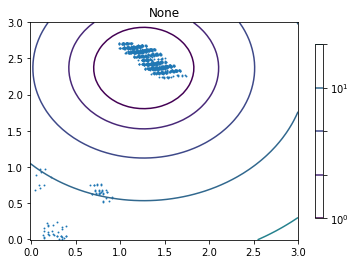

Negative log-likelihood predicted by GMM with n_components = 1 and covariance_type = diag


/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


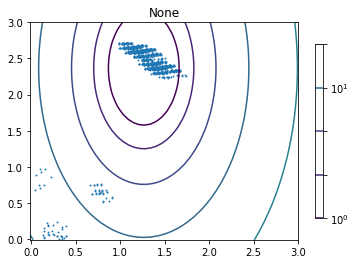

Negative log-likelihood predicted by GMM with n_components = 1 and covariance_type = tied


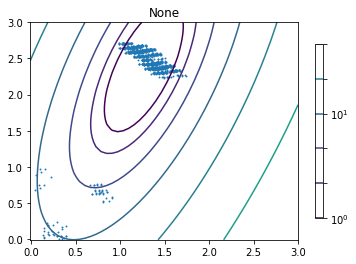

Negative log-likelihood predicted by GMM with n_components = 1 and covariance_type = full


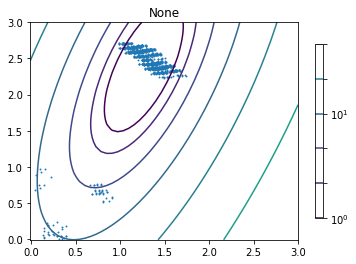

Negative log-likelihood predicted by GMM with n_components = 2 and covariance_type = spherical


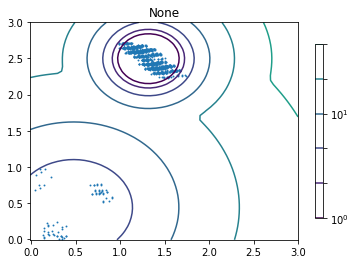

Negative log-likelihood predicted by GMM with n_components = 2 and covariance_type = diag


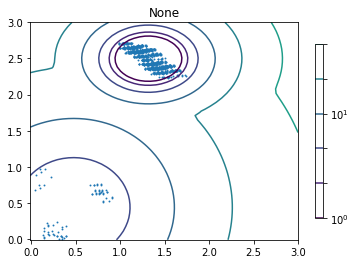

Negative log-likelihood predicted by GMM with n_components = 2 and covariance_type = tied


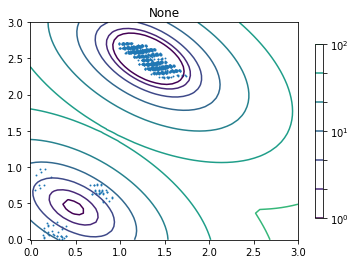

Negative log-likelihood predicted by GMM with n_components = 2 and covariance_type = full


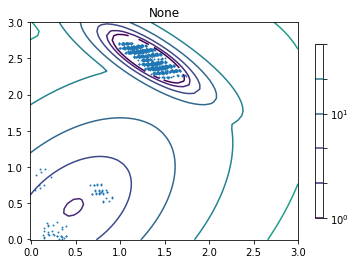

Negative log-likelihood predicted by GMM with n_components = 3 and covariance_type = spherical


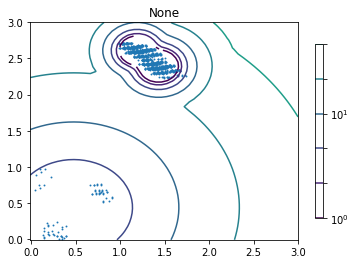

Negative log-likelihood predicted by GMM with n_components = 3 and covariance_type = diag


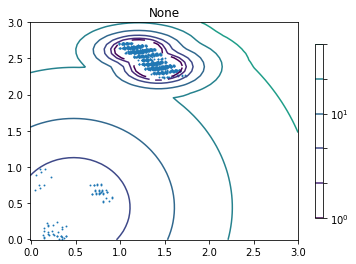

Negative log-likelihood predicted by GMM with n_components = 3 and covariance_type = tied


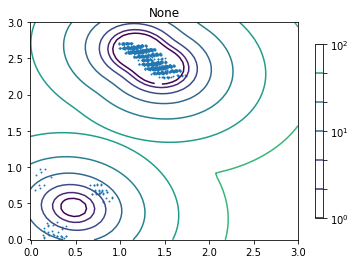

Negative log-likelihood predicted by GMM with n_components = 3 and covariance_type = full


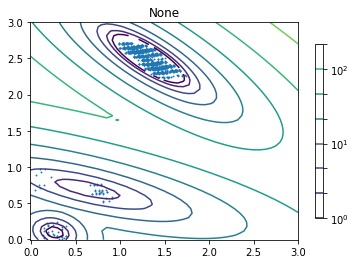

Negative log-likelihood predicted by GMM with n_components = 4 and covariance_type = spherical


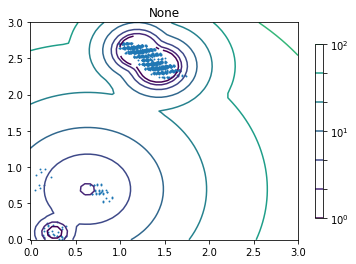

Negative log-likelihood predicted by GMM with n_components = 4 and covariance_type = diag


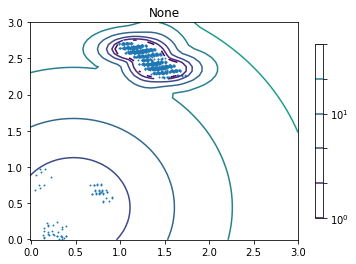

Negative log-likelihood predicted by GMM with n_components = 4 and covariance_type = tied


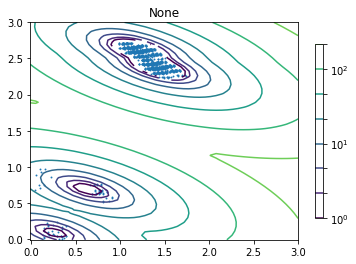

Negative log-likelihood predicted by GMM with n_components = 4 and covariance_type = full


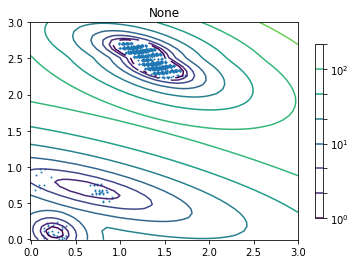

In [121]:
def P4():
    
### STUDENT START ###

    #This converts to a 2d array#
    Y11= Y1.tolist()
    Y12= Y2.tolist()
    indices = []
    for ii in range(X1.shape[0]):
        if Y11[ii] >= 0:
            if Y12[ii] >= 0:
                indices.append(Y12.index(Y12[ii]))
    Y13= [Y11[i] for i in indices]
    Y14= [Y12[i] for i in indices]
    True3= np.vstack((Y13,Y14))
    True3= True3.transpose()
    True4 = np.array(True3)
    
    list1= [1,2,3,4]
    list2  = ['spherical', 'diag', 'tied', 'full']
    for iv in list1:
        for v in list2:
            clf = GaussianMixture(n_components= iv, covariance_type= v)
            clf.fit(True4)

            # display predicted scores by the model as a contour plot
            x = np.linspace(-0.01, 3.0)
            y = np.linspace(-0.01, 3.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(True4[:, 0], True4[:, 1], .8)

            plt.title(print('Negative log-likelihood predicted by GMM with n_components =', iv, 'and covariance_type =', v))
            plt.axis('tight')
            plt.show()


### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [151]:
def P5():
    
    
### STUDENT START ###

    ##Positive-Example##
    Y11= Y1.tolist()
    Y12= Y2.tolist()
    indices = []
    for ii in range(X1.shape[0]):
        if Y11[ii] >= 0:
            if Y12[ii] >= 0:
                indices.append(Y12.index(Y12[ii]))
    Y13= [Y11[i] for i in indices]
    Y14= [Y12[i] for i in indices]
    True3= np.vstack((Y13,Y14))
    True3= True3.transpose()
    True4 = np.array(True3)
    
    clf = GaussianMixture(n_components= 4, covariance_type= 'full')
    clf.fit(True4)
    #Transform the Test-data to a 4-component dataframe#
    
    pcal = PCA(n_components=2)
    X2 = pca1.fit_transform(test_data)
    qq = clf.predict(X2)
    print("This is the reported probability of the classifier with +ve PCA Features", clf.score(X2))

    ##Negative-Example##
    indices2 = []
    for ii in range(X1.shape[0]):
        if Y11[ii] < 0:
            if Y12[ii] < 0:
                indices2.append(Y12.index(Y12[ii]))
    Y15= [Y11[i] for i in indices2]
    Y16= [Y12[i] for i in indices2]
    True5= np.vstack((Y15,Y16))
    True6= True5.transpose()
    True7 = np.array(True6)
    
    clf = GaussianMixture(n_components= 4, covariance_type= 'full')
    clf.fit(True7)
    zz = clf.predict(X2)
    print("This is the reported probability of the classifier with -ve PCA Features", clf.score(X2))
    
    ### STUDENT END ###

    #Positive Example with n_components=2#
    indices3 = []
    for ii in range(X1.shape[0]):
        if Y11[ii] >= 0:
            if Y12[ii] >= 0:
                indices3.append(Y12.index(Y12[ii]))
    Y13= [Y11[i] for i in indices3]
    Y14= [Y12[i] for i in indices3]
    True8= np.vstack((Y13,Y14))
    True8= True8.transpose()
    True9 = np.array(True8)
    
    clf = GaussianMixture(n_components= 4, covariance_type= 'full')
    clf.fit(True9)
    qz = clf.predict(X2)
    print("This is the reported probability of the classifier with +ve PCA Features", clf.score(X2))

    
    ##Checking for Acccuracy##
    correct, total = 0, 0
    for pred, label in zip(qz, test_labels):
        if pred == label: 
            correct += 1
        total += 1
    print ("The accuracy with PCA of 2 features and 2 n_components is",  correct/total)

P5()

This is the reported probability of the classifier with +ve PCA Features -208.65963040150353
This is the reported probability of the classifier with -ve PCA Features -52.1687507214907
This is the reported probability of the classifier with +ve PCA Features -33.55846691787597
The accuracy with PCA of 2 features and 2 n_components is 0.6387900355871886


In [134]:
Y11= Y1.tolist()
Y12= Y2.tolist()
indices = []
for ii in range(X1.shape[0]):
    if Y11[ii] >= 0:
        if Y12[ii] >= 0:
            indices.append(Y12.index(Y12[ii]))
Y13= [Y11[i] for i in indices]
Y14= [Y12[i] for i in indices]
True3= np.vstack((Y13,Y14))
True3= True3.transpose()
True4 = np.array(True3)
    
clf = GaussianMixture(n_components= 4, covariance_type= 'full')
clf.fit(True4)
qq = clf.predict(True4)


In [124]:
True4.shape

(1131, 2)

In [137]:
clf.score(True4)

1.5090130269574749

In [139]:
XX= clf.score_samples(True4)
XX.shape

(1131,)

In [125]:
print(qq)

[2 2 2 ... 1 1 1]


In [129]:
np.unique(qq)

array([0, 1, 2, 3])

In [140]:
np.unique(train_labels)

array([0, 1])

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [153]:
def P6():
    
    
### STUDENT START ###
    list0 = [ii+1 for ii in range(50)]
    list1 = [1,2,3,4,5,6,7]
    list2 = ['spherical', 'diag', 'tied', 'full']
    
    for ii in list0:
        for iii in list1:
            for iv in list2:
                pca = PCA(n_components=ii)
                X1 = pca.fit_transform(train_data)
                
                ##The Test-Data needs also to be fit-transformed##
                X2 = pca.fit_transform(test_data)
                
                
                clf = GaussianMixture(n_components= iii, covariance_type= iv)
                clf.fit(X1)
                qz = clf.predict(X2)
                print("This is the reported max-probability of the classifier with Gaussian n_components =", iii,"and PCA components =",ii ,"and co-variance type =", iv,  clf.score(X2))

    
                ##Checking for Acccuracy##
                correct, total = 0, 0
                for pred, label in zip(qz, test_labels):
                    if pred == label: 
                        correct += 1
                    total += 1
                print ("The accuracy with PCA of", ii ,"features","and Gaussian n_components of",iii,"components and covariance type of", iv,"is ",  correct/total)
### STUDENT END ###



P6()

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 1 and co-variance type = spherical -1.8406787954993902
The accuracy with PCA of 1 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 1 and co-variance type = diag -1.8406787954993833
The accuracy with PCA of 1 features and Gaussian n_components of 1 components and covariance type of diag is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 1 and co-variance type = tied -1.840678795499383
The accuracy with PCA of 1 features and Gaussian n_components of 1 components and covariance type of tied is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 1 and co-variance type = f

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 2 and co-variance type = full -3.5897667203234436
The accuracy with PCA of 2 features and Gaussian n_components of 1 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 2 and co-variance type = spherical -4.254946900606472
The accuracy with PCA of 2 features and Gaussian n_components of 2 components and covariance type of spherical is  0.798932384341637
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 2 and co-variance type = diag -4.029764931291774
The accuracy with PCA of 2 features and Gaussian n_components of 2 components and covariance type of diag is  0.40480427046263345
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 2 and co-variance type = ti

This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 3 and co-variance type = spherical -5.404964191085193
The accuracy with PCA of 3 features and Gaussian n_components of 2 components and covariance type of spherical is  0.4092526690391459
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 3 and co-variance type = diag -6.648408099670899
The accuracy with PCA of 3 features and Gaussian n_components of 2 components and covariance type of diag is  0.3193950177935943
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 3 and co-variance type = tied -5.064678320670715
The accuracy with PCA of 3 features and Gaussian n_components of 2 components and covariance type of tied is  0.5685053380782918
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 3 and co-variance type = ful

This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 4 and co-variance type = full -9.413944488204097
The accuracy with PCA of 4 features and Gaussian n_components of 2 components and covariance type of full is  0.5124555160142349
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 4 and co-variance type = spherical -7.146511327570999
The accuracy with PCA of 4 features and Gaussian n_components of 3 components and covariance type of spherical is  0.40569395017793597
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 4 and co-variance type = diag -6.586032385599057
The accuracy with PCA of 4 features and Gaussian n_components of 3 components and covariance type of diag is  0.7117437722419929
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 4 and co-variance type = ti

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 5 and co-variance type = diag -10.869172533798803
The accuracy with PCA of 5 features and Gaussian n_components of 3 components and covariance type of diag is  0.31761565836298933
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 5 and co-variance type = tied -6.2243581066846
The accuracy with PCA of 5 features and Gaussian n_components of 3 components and covariance type of tied is  0.4279359430604982
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 5 and co-variance type = full -15.060041458471597
The accuracy with PCA of 5 features and Gaussian n_components of 3 components and covariance type of full is  0.3193950177935943
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 5 and co-variance type = spherical -9

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 6 and co-variance type = tied -17.34920112572064
The accuracy with PCA of 6 features and Gaussian n_components of 3 components and covariance type of tied is  0.48665480427046265
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 6 and co-variance type = full -16.134928046269454
The accuracy with PCA of 6 features and Gaussian n_components of 3 components and covariance type of full is  0.6565836298932385
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 6 and co-variance type = spherical -9.96894049210288
The accuracy with PCA of 6 features and Gaussian n_components of 4 components and covariance type of spherical is  0.4386120996441281
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 6 and co-variance type = di

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 7 and co-variance type = full -18.999012683916273
The accuracy with PCA of 7 features and Gaussian n_components of 3 components and covariance type of full is  0.693950177935943
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 7 and co-variance type = spherical -11.690102296029853
The accuracy with PCA of 7 features and Gaussian n_components of 4 components and covariance type of spherical is  0.5258007117437722
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 7 and co-variance type = diag -14.85844301060316
The accuracy with PCA of 7 features and Gaussian n_components of 4 components and covariance type of diag is  0.4012455516014235
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 7 and co-variance type = ti

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 8 and co-variance type = tied -20.322683022287936
The accuracy with PCA of 8 features and Gaussian n_components of 4 components and covariance type of tied is  0.14501779359430605
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 8 and co-variance type = full -23.33894336748609
The accuracy with PCA of 8 features and Gaussian n_components of 4 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 8 and co-variance type = spherical -13.19232538323307
The accuracy with PCA of 8 features and Gaussian n_components of 5 components and covariance type of spherical is  0.0008896797153024911
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 8 and co-variance type = diag -18.8360

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 9 and co-variance type = full -33.512721485849596
The accuracy with PCA of 9 features and Gaussian n_components of 4 components and covariance type of full is  0.6272241992882562
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 9 and co-variance type = spherical -13.987769023711339
The accuracy with PCA of 9 features and Gaussian n_components of 5 components and covariance type of spherical is  0.4234875444839858
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 9 and co-variance type = diag -19.752762787271998
The accuracy with PCA of 9 features and Gaussian n_components of 5 components and covariance type of diag is  0.11387900355871886
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 9 and co-variance type =

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 10 and co-variance type = diag -21.12681329144678
The accuracy with PCA of 10 features and Gaussian n_components of 5 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 10 and co-variance type = tied -29.29914991274149
The accuracy with PCA of 10 features and Gaussian n_components of 5 components and covariance type of tied is  0.46352313167259784
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 10 and co-variance type = full -33.215265026268945
The accuracy with PCA of 10 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 10 and co-variance type = spherical -15.783151640003407
The 

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 11 and co-variance type = full -41.812767020793764
The accuracy with PCA of 11 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 11 and co-variance type = spherical -16.626448062852642
The accuracy with PCA of 11 features and Gaussian n_components of 6 components and covariance type of spherical is  0.037366548042704624
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 11 and co-variance type = diag -21.135652231885455
The accuracy with PCA of 11 features and Gaussian n_components of 6 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 11 and co-variance type = tied -38.816522299749

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 12 and co-variance type = spherical -17.37637343019121
The accuracy with PCA of 12 features and Gaussian n_components of 6 components and covariance type of spherical is  0.304270462633452
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 12 and co-variance type = diag -24.60516937389765
The accuracy with PCA of 12 features and Gaussian n_components of 6 components and covariance type of diag is  0.037366548042704624
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 12 and co-variance type = tied -40.1519325639775
The accuracy with PCA of 12 features and Gaussian n_components of 6 components and covariance type of tied is  0.0693950177935943
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 12 and co-variance typ

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 13 and co-variance type = tied -30.586946489780395
The accuracy with PCA of 13 features and Gaussian n_components of 6 components and covariance type of tied is  0.16637010676156583
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 13 and co-variance type = full -89.39007870256344
The accuracy with PCA of 13 features and Gaussian n_components of 6 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 13 and co-variance type = spherical -17.792416448327625
The accuracy with PCA of 13 features and Gaussian n_components of 7 components and covariance type of spherical is  0.3736654804270463
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 13 and co-variance type = diag -26

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 14 and co-variance type = spherical -19.199666543846362
The accuracy with PCA of 14 features and Gaussian n_components of 7 components and covariance type of spherical is  0.12099644128113879
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 14 and co-variance type = diag -25.797894358109318
The accuracy with PCA of 14 features and Gaussian n_components of 7 components and covariance type of diag is  0.18683274021352314
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 14 and co-variance type = tied -52.82898605166809
The accuracy with PCA of 14 features and Gaussian n_components of 7 components and covariance type of tied is  0.2713523131672598
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 14 and co-variance

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 15 and co-variance type = tied -43.53877127053194
The accuracy with PCA of 15 features and Gaussian n_components of 7 components and covariance type of tied is  0.16281138790035588
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 15 and co-variance type = full -112.82075182956915
The accuracy with PCA of 15 features and Gaussian n_components of 7 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 16 and co-variance type = spherical -17.996337513691216
The accuracy with PCA of 16 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 16 and co-variance type = diag -14

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 16 and co-variance type = full -163.13086597989096
The accuracy with PCA of 16 features and Gaussian n_components of 7 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 17 and co-variance type = spherical -18.750471616441146
The accuracy with PCA of 17 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 17 and co-variance type = diag -15.445803722972595
The accuracy with PCA of 17 features and Gaussian n_components of 1 components and covariance type of diag is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 17 and co-variance type = tied -15

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 18 and co-variance type = spherical -19.487608052077988
The accuracy with PCA of 18 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 18 and co-variance type = diag -15.922798315375607
The accuracy with PCA of 18 features and Gaussian n_components of 1 components and covariance type of diag is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 18 and co-variance type = tied -15.923706095710255
The accuracy with PCA of 18 features and Gaussian n_components of 1 components and covariance type of tied is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 18 and co-variance 

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 19 and co-variance type = tied -16.344325596010876
The accuracy with PCA of 19 features and Gaussian n_components of 1 components and covariance type of tied is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 19 and co-variance type = full -16.344407967213684
The accuracy with PCA of 19 features and Gaussian n_components of 1 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 19 and co-variance type = spherical -20.06360261580145
The accuracy with PCA of 19 features and Gaussian n_components of 2 components and covariance type of spherical is  0.45373665480427045
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 19 and co-variance 

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 20 and co-variance type = full -16.75788538115864
The accuracy with PCA of 20 features and Gaussian n_components of 1 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 20 and co-variance type = spherical -20.488623956228054
The accuracy with PCA of 20 features and Gaussian n_components of 2 components and covariance type of spherical is  0.5862989323843416
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 20 and co-variance type = diag -17.354642912148726
The accuracy with PCA of 20 features and Gaussian n_components of 2 components and covariance type of diag is  0.6352313167259787
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 20 and co-variance t

This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 21 and co-variance type = tied -24.61042139141346
The accuracy with PCA of 21 features and Gaussian n_components of 2 components and covariance type of tied is  0.5934163701067615
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 21 and co-variance type = full -62.66685047813151
The accuracy with PCA of 21 features and Gaussian n_components of 2 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 21 and co-variance type = spherical -21.462245580019644
The accuracy with PCA of 21 features and Gaussian n_components of 3 components and covariance type of spherical is  0.3692170818505338
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 21 and co-variance ty

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 22 and co-variance type = spherical -21.061724941675816
The accuracy with PCA of 22 features and Gaussian n_components of 3 components and covariance type of spherical is  0.22419928825622776
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 22 and co-variance type = diag -21.14675915978286
The accuracy with PCA of 22 features and Gaussian n_components of 3 components and covariance type of diag is  0.0035587188612099642
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 22 and co-variance type = tied -44.14827946685632
The accuracy with PCA of 22 features and Gaussian n_components of 3 components and covariance type of tied is  0.17793594306049823
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 22 and co-varian

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 23 and co-variance type = tied -19.775947451674526
The accuracy with PCA of 23 features and Gaussian n_components of 3 components and covariance type of tied is  0.19395017793594305
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 23 and co-variance type = full -98.34716602765782
The accuracy with PCA of 23 features and Gaussian n_components of 3 components and covariance type of full is  0.08185053380782918
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 23 and co-variance type = spherical -23.420109802938914
The accuracy with PCA of 23 features and Gaussian n_components of 4 components and covariance type of spherical is  0.011565836298932384
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 23 and co-varian

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 24 and co-variance type = spherical -24.04107613854591
The accuracy with PCA of 24 features and Gaussian n_components of 4 components and covariance type of spherical is  0.28113879003558717
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 24 and co-variance type = diag -25.140470386737853
The accuracy with PCA of 24 features and Gaussian n_components of 4 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 24 and co-variance type = tied -48.11419584847615
The accuracy with PCA of 24 features and Gaussian n_components of 4 components and covariance type of tied is  0.49377224199288255
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 24 and co-variance type = full -12

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 25 and co-variance type = diag -25.826056625714138
The accuracy with PCA of 25 features and Gaussian n_components of 4 components and covariance type of diag is  0.3211743772241993
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 25 and co-variance type = tied -47.354048814774124
The accuracy with PCA of 25 features and Gaussian n_components of 4 components and covariance type of tied is  0.47419928825622776
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 25 and co-variance type = full -237.90278680471891
The accuracy with PCA of 25 features and Gaussian n_components of 4 components and covariance type of full is  0.3202846975088968
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 25 and co-variance type = sp

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 26 and co-variance type = full -89.64394551268455
The accuracy with PCA of 26 features and Gaussian n_components of 4 components and covariance type of full is  0.6387900355871886
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 26 and co-variance type = spherical -25.05770557214055
The accuracy with PCA of 26 features and Gaussian n_components of 5 components and covariance type of spherical is  0.3709964412811388
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 26 and co-variance type = diag -28.896878387868252
The accuracy with PCA of 26 features and Gaussian n_components of 5 components and covariance type of diag is  0.2722419928825623
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 26 and co-variance ty

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 27 and co-variance type = diag -29.254933093407956
The accuracy with PCA of 27 features and Gaussian n_components of 5 components and covariance type of diag is  0.148576512455516
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 27 and co-variance type = tied -56.06373726841594
The accuracy with PCA of 27 features and Gaussian n_components of 5 components and covariance type of tied is  0.3709964412811388
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 27 and co-variance type = full -134.66581680528242
The accuracy with PCA of 27 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 27 and co-variance type = spherical -25.882446

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 28 and co-variance type = full -249.9234527547461
The accuracy with PCA of 28 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 28 and co-variance type = spherical -26.363388169335416
The accuracy with PCA of 28 features and Gaussian n_components of 6 components and covariance type of spherical is  0.39234875444839856
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 28 and co-variance type = diag -29.86487644309509
The accuracy with PCA of 28 features and Gaussian n_components of 6 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 28 and co-variance type = tied -76.6331132237576
T

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 29 and co-variance type = diag -30.02161874424381
The accuracy with PCA of 29 features and Gaussian n_components of 6 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 29 and co-variance type = tied -78.75127554149229
The accuracy with PCA of 29 features and Gaussian n_components of 6 components and covariance type of tied is  0.19661921708185054
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 29 and co-variance type = full -1861.5303545329614
The accuracy with PCA of 29 features and Gaussian n_components of 6 components and covariance type of full is  0.6379003558718861
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 29 and co-variance type = spherical -27.00916

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 30 and co-variance type = full -365.6042468906743
The accuracy with PCA of 30 features and Gaussian n_components of 6 components and covariance type of full is  0.6387900355871886
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 30 and co-variance type = spherical -27.138294271131645
The accuracy with PCA of 30 features and Gaussian n_components of 7 components and covariance type of spherical is  0.1290035587188612
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 30 and co-variance type = diag -33.90494516683904
The accuracy with PCA of 30 features and Gaussian n_components of 7 components and covariance type of diag is  0.0026690391459074734
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 30 and co-variance

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 31 and co-variance type = diag -31.28124735557141
The accuracy with PCA of 31 features and Gaussian n_components of 7 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 31 and co-variance type = tied -88.78933300735669
The accuracy with PCA of 31 features and Gaussian n_components of 7 components and covariance type of tied is  0.1619217081850534
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 31 and co-variance type = full -13316.165464220103
The accuracy with PCA of 31 features and Gaussian n_components of 7 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 32 and co-variance type = spherical -27.54914396759394
The ac

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 32 and co-variance type = tied -117.78188539468924
The accuracy with PCA of 32 features and Gaussian n_components of 7 components and covariance type of tied is  0.1201067615658363
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 32 and co-variance type = full -8420.059615151087
The accuracy with PCA of 32 features and Gaussian n_components of 7 components and covariance type of full is  0.1290035587188612
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 33 and co-variance type = spherical -27.98834514807954
The accuracy with PCA of 33 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 33 and co-variance ty

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 33 and co-variance type = full -141147.5426365018
The accuracy with PCA of 33 features and Gaussian n_components of 7 components and covariance type of full is  0.13167259786476868
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 34 and co-variance type = spherical -28.410901039170195
The accuracy with PCA of 34 features and Gaussian n_components of 1 components and covariance type of spherical is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 34 and co-variance type = diag -18.85967720814426
The accuracy with PCA of 34 features and Gaussian n_components of 1 components and covariance type of diag is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 34 and co-variance t

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 35 and co-variance type = diag -18.785850524425108
The accuracy with PCA of 35 features and Gaussian n_components of 1 components and covariance type of diag is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 35 and co-variance type = tied -18.785391854078348
The accuracy with PCA of 35 features and Gaussian n_components of 1 components and covariance type of tied is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 35 and co-variance type = full -18.784457593698516
The accuracy with PCA of 35 features and Gaussian n_components of 1 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 35 and co-variance type = sph

This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 36 and co-variance type = full -18.66252829207538
The accuracy with PCA of 36 features and Gaussian n_components of 1 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 36 and co-variance type = spherical -28.31376621266694
The accuracy with PCA of 36 features and Gaussian n_components of 2 components and covariance type of spherical is  0.5845195729537367
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 36 and co-variance type = diag -31.096015577744662
The accuracy with PCA of 36 features and Gaussian n_components of 2 components and covariance type of diag is  0.3167259786476868
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 36 and co-variance ty

This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 37 and co-variance type = diag -32.84608525258332
The accuracy with PCA of 37 features and Gaussian n_components of 2 components and covariance type of diag is  0.38434163701067614
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 37 and co-variance type = tied -18.81400855465492
The accuracy with PCA of 37 features and Gaussian n_components of 2 components and covariance type of tied is  0.3238434163701068
This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 37 and co-variance type = full -683.9098433288688
The accuracy with PCA of 37 features and Gaussian n_components of 2 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 37 and co-variance type = spher

This is the reported max-probability of the classifier with Gaussian n_components = 2 and PCA components = 38 and co-variance type = full -1356.9579511750062
The accuracy with PCA of 38 features and Gaussian n_components of 2 components and covariance type of full is  0.6387900355871886
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 38 and co-variance type = spherical -26.322053183537
The accuracy with PCA of 38 features and Gaussian n_components of 3 components and covariance type of spherical is  0.29270462633451955
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 38 and co-variance type = diag -31.991240176475713
The accuracy with PCA of 38 features and Gaussian n_components of 3 components and covariance type of diag is  0.3220640569395018
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 38 and co-variance ty

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 39 and co-variance type = diag -28.33877077217434
The accuracy with PCA of 39 features and Gaussian n_components of 3 components and covariance type of diag is  0.36565836298932386
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 39 and co-variance type = tied -61.26625502335486
The accuracy with PCA of 39 features and Gaussian n_components of 3 components and covariance type of tied is  0.5622775800711743
This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 39 and co-variance type = full -1498.529803797509
The accuracy with PCA of 39 features and Gaussian n_components of 3 components and covariance type of full is  0.6387900355871886
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 39 and co-variance type = spher

This is the reported max-probability of the classifier with Gaussian n_components = 3 and PCA components = 40 and co-variance type = full -3978.8349840694877
The accuracy with PCA of 40 features and Gaussian n_components of 3 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 40 and co-variance type = spherical -28.02409755145827
The accuracy with PCA of 40 features and Gaussian n_components of 4 components and covariance type of spherical is  0.2571174377224199
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 40 and co-variance type = diag -90.02512114381845
The accuracy with PCA of 40 features and Gaussian n_components of 4 components and covariance type of diag is  0.10320284697508897
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 40 and co-variance t

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 41 and co-variance type = spherical -30.08187318132219
The accuracy with PCA of 41 features and Gaussian n_components of 4 components and covariance type of spherical is  0.3113879003558719
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 41 and co-variance type = diag -39.436263621335016
The accuracy with PCA of 41 features and Gaussian n_components of 4 components and covariance type of diag is  0.6218861209964412
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 41 and co-variance type = tied -58.9784786823358
The accuracy with PCA of 41 features and Gaussian n_components of 4 components and covariance type of tied is  0.1583629893238434
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 41 and co-variance typ

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 42 and co-variance type = diag -39.1156380097655
The accuracy with PCA of 42 features and Gaussian n_components of 4 components and covariance type of diag is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 42 and co-variance type = tied -53.443775153688584
The accuracy with PCA of 42 features and Gaussian n_components of 4 components and covariance type of tied is  0.5026690391459074
This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 42 and co-variance type = full -22416.978251902743
The accuracy with PCA of 42 features and Gaussian n_components of 4 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 42 and co-variance type = spherical -28.843606

This is the reported max-probability of the classifier with Gaussian n_components = 4 and PCA components = 43 and co-variance type = full -21962.49783289347
The accuracy with PCA of 43 features and Gaussian n_components of 4 components and covariance type of full is  0.3612099644128114
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 43 and co-variance type = spherical -30.312637315413248
The accuracy with PCA of 43 features and Gaussian n_components of 5 components and covariance type of spherical is  0.3834519572953737
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 43 and co-variance type = diag -39.92613667610731
The accuracy with PCA of 43 features and Gaussian n_components of 5 components and covariance type of diag is  0.0008896797153024911
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 43 and co-variance

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 44 and co-variance type = diag -39.78798411951671
The accuracy with PCA of 44 features and Gaussian n_components of 5 components and covariance type of diag is  0.3594306049822064
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 44 and co-variance type = tied -74.40774748792079
The accuracy with PCA of 44 features and Gaussian n_components of 5 components and covariance type of tied is  0.34519572953736655
This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 44 and co-variance type = full -40305.24402009423
The accuracy with PCA of 44 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 44 and co-variance type = spherical -30.844750

This is the reported max-probability of the classifier with Gaussian n_components = 5 and PCA components = 45 and co-variance type = full -81734.34397778581
The accuracy with PCA of 45 features and Gaussian n_components of 5 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 45 and co-variance type = spherical -30.897584250960843
The accuracy with PCA of 45 features and Gaussian n_components of 6 components and covariance type of spherical is  0.050711743772241996
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 45 and co-variance type = diag -40.47360303308798
The accuracy with PCA of 45 features and Gaussian n_components of 6 components and covariance type of diag is  0.012455516014234875
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 45 and co-variance type = tied -

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 46 and co-variance type = diag -41.71379735536817
The accuracy with PCA of 46 features and Gaussian n_components of 6 components and covariance type of diag is  0.03825622775800712
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 46 and co-variance type = tied -125.79179884456326
The accuracy with PCA of 46 features and Gaussian n_components of 6 components and covariance type of tied is  0.011565836298932384
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 46 and co-variance type = full -88231.84346550154
The accuracy with PCA of 46 features and Gaussian n_components of 6 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 46 and co-variance type = spherical -31.776

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 47 and co-variance type = tied -120.85123692221947
The accuracy with PCA of 47 features and Gaussian n_components of 6 components and covariance type of tied is  0.32295373665480426
This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 47 and co-variance type = full -83747.01406347463
The accuracy with PCA of 47 features and Gaussian n_components of 6 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 47 and co-variance type = spherical -32.26245176480777
The accuracy with PCA of 47 features and Gaussian n_components of 7 components and covariance type of spherical is  0.23576512455516013
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 47 and co-variance type = diag -41

This is the reported max-probability of the classifier with Gaussian n_components = 6 and PCA components = 48 and co-variance type = full -809647.7536066219
The accuracy with PCA of 48 features and Gaussian n_components of 6 components and covariance type of full is  0.03291814946619217
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 48 and co-variance type = spherical -31.797340933806424
The accuracy with PCA of 48 features and Gaussian n_components of 7 components and covariance type of spherical is  0.29359430604982206
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 48 and co-variance type = diag -49.76924186881026
The accuracy with PCA of 48 features and Gaussian n_components of 7 components and covariance type of diag is  0.006227758007117438
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 48 and co-varianc

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 49 and co-variance type = diag -37.20806327901872
The accuracy with PCA of 49 features and Gaussian n_components of 7 components and covariance type of diag is  0.6014234875444839
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 49 and co-variance type = tied -80.69712161404102
The accuracy with PCA of 49 features and Gaussian n_components of 7 components and covariance type of tied is  0.03558718861209965
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 49 and co-variance type = full -125625.96821312745
The accuracy with PCA of 49 features and Gaussian n_components of 7 components and covariance type of full is  0.0
This is the reported max-probability of the classifier with Gaussian n_components = 1 and PCA components = 50 and co-variance type = spherical -33.16257

This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 50 and co-variance type = tied -224.73191981375697
The accuracy with PCA of 50 features and Gaussian n_components of 7 components and covariance type of tied is  0.2411032028469751
This is the reported max-probability of the classifier with Gaussian n_components = 7 and PCA components = 50 and co-variance type = full -1039386.4347285437
The accuracy with PCA of 50 features and Gaussian n_components of 7 components and covariance type of full is  0.4724199288256228
